In [1]:
import numpy as np
import pandas as pd

Norms for the untargeted bb attack

In [2]:
df_clean = pd.read_csv("untargeted_mybb_obs.csv",
                       index_col=0)
df_adv = pd.read_csv("untargeted_mybb_adv_obs.csv",
                     index_col=0)

In [3]:
df_diff = df_adv - df_clean
adv_norms = df_diff.apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

Compared to the regulat PPO 500, the mean perturbation increased from 2.68%, though this must be confirmed over multiple runs

In [4]:
adv_norms.describe()

count    8759.000000
mean        0.032339
std         0.030495
min         0.000009
25%         0.009737
50%         0.023674
75%         0.045971
max         0.316254
dtype: float64

try setting xlim to 0

<Axes: ylabel='Density'>

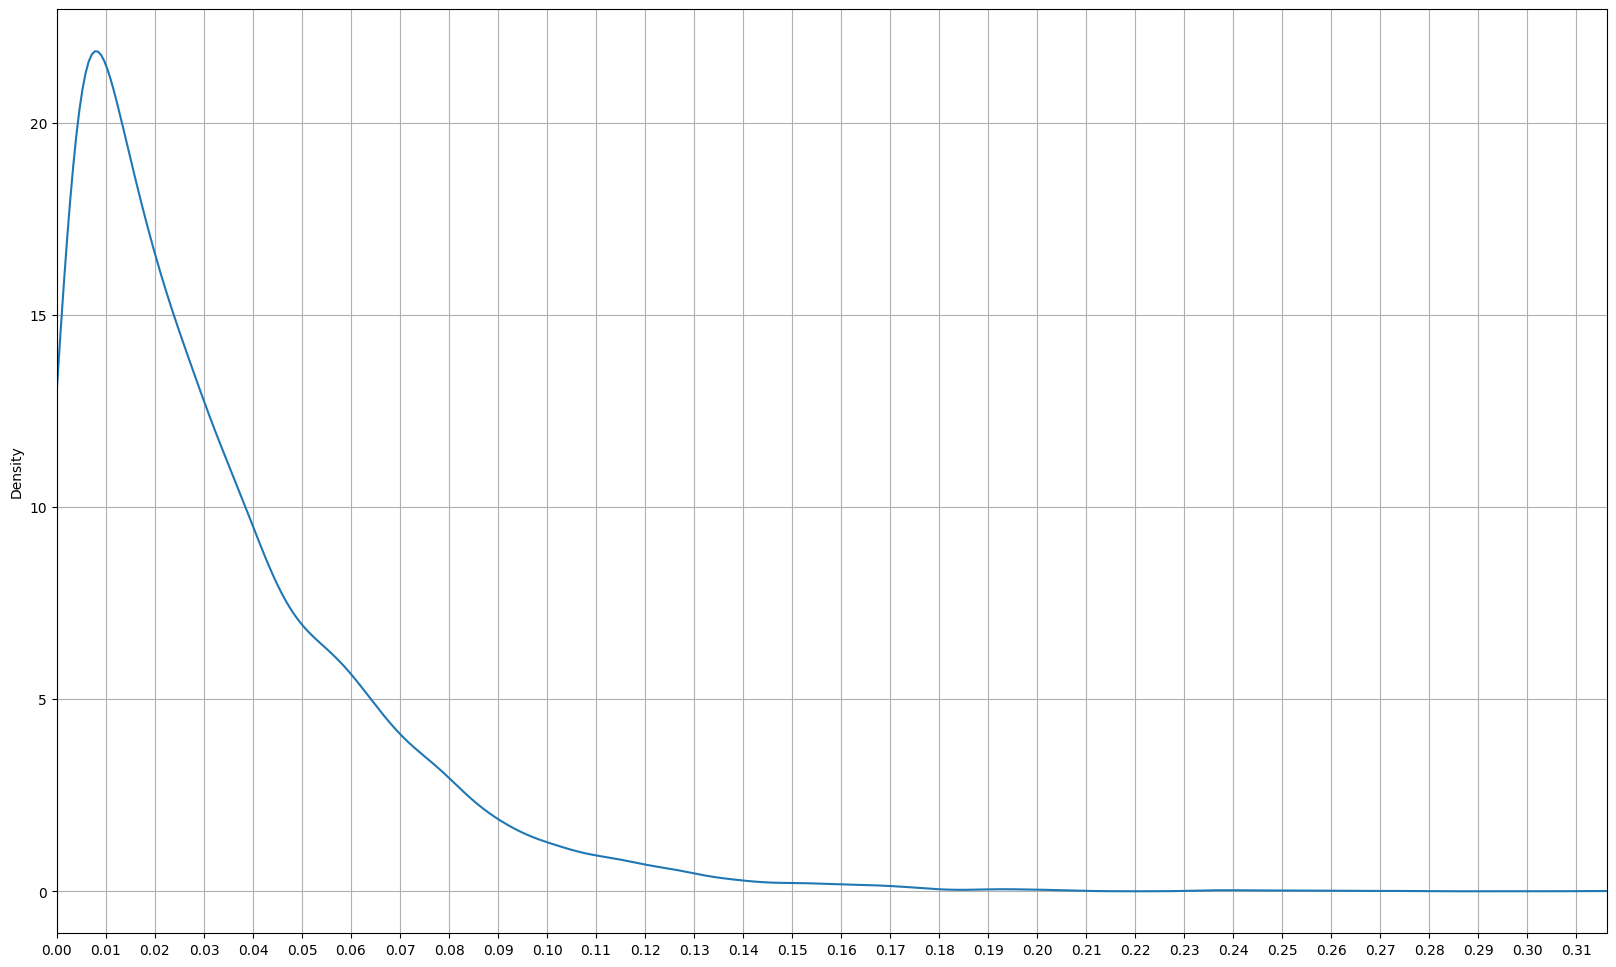

In [5]:
adv_norms.plot.kde(grid=True, 
                   xticks=np.arange(start=adv_norms.min(), stop=adv_norms.max(), step=0.01),
                   figsize=(20,12),
                   xlim=[adv_norms.min(),adv_norms.max()],
                   )